# **Tarea 2. Análisis de Datos con Python**
Maestría en Ciencias Matemáticas Aplicadas e Industriales

Brandon Eduardo Antonio Gómez

1.  Dada la siguiente lista de vectores en $\mathbb{R}^3$

$vectores=\{[0,1,0], [1,1,0], [1,2,3], [-1, 0, 1], [0, 0, 1], [-1, 1, 0], [2, 1, 1], [3, 0.5, -1]\}$

escriba una función que calcule el ángulo que cada uno de estos vectores forma con respecto al vector fijo $a=[1,0,0]$
, y muestre únicamente aquellos vectores cuyo ángulo sea mayor a $80°$, junto con el valor correspondiente del ángulo (en grados).

In [106]:
import numpy as np
import pandas as pd
lista_vector = [[0,1,0], [1,1,0], [1,2,3], [-1, 0, 1], [0, 0, 1],
                [-1, 1, 0], [2, 1, 1], [3, 0.5, -1]]

a= np.array([1, 0, 0]) # vector fijo

# Se calcula el ángulo entre los vectores de la lista_vector y el vector fijo a
# cos(theta)=a*b/||a||||b||

def angulo_vectores(v,a):

  cos_theta = np.dot(a,v)/(np.linalg.norm(a)*np.linalg.norm(v))
  theta = np.arccos(cos_theta) # np.arcos(x) devuelve el ángulo en radianes
  theta = np.degrees(theta) # se convierte a grados
  return theta

for v in lista_vector:
  print("Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: ")
  print(angulo_vectores(v,a))

Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
90.0
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
45.00000000000001
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
74.498640433063
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
135.0
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
90.0
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
135.0
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
35.26438968275465
Los ángulos formados por el vector fijo 'a' y cada vector de la lista son: 
20.439317573258254


In [107]:
# Se define una función en donde el ángulo sea mayor a 80 grados

def angulo_mayor_80(v,a):
  # se crea una lista vacía
  vectores_mayores_80 = []
  for v in lista_vector:
    angulo = angulo_vectores(v,a) # se guarda cada ángulo
    if angulo > 80:
      vectores_mayores_80.append((v, angulo))
  return vectores_mayores_80

print("Los vectores con un ángulo mayor a 80 grados son: ")
print(angulo_mayor_80(v,a))

Los vectores con un ángulo mayor a 80 grados son: 
[([0, 1, 0], np.float64(90.0)), ([-1, 0, 1], np.float64(135.0)), ([0, 0, 1], np.float64(90.0)), ([-1, 1, 0], np.float64(135.0))]


2. Sea la siguiente función definida por partes:

$f(x,y)= \begin{cases}
  \sin(x^2+y^2), & \text{si} \quad x^2+y^2 \leq 4 \\
  \cos(x-y), & \text{si} \quad 4 < x^2+y^2< 12 \\
  -1, & \text{si}\quad 12 \leq x^2 + y^2
  \end{cases}$

visualizar la función en el dominio $[-6,6] \times [-6,6]$
utilizando

```
plt.imshow()
```

In [108]:
# se importa las biblioteca matplotlib
import matplotlib.pyplot as plt

In [109]:
# Se crea una malla
x = np.linspace(-6, 6, 500)
y = np.linspace(-6, 6, 500)


In [110]:
X, Y = np.meshgrid(x, y)

In [111]:
# se inicializa la matriz en donse se van a guardar los valores de cada función
Z = np.zeros_like(X)
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
# se definen las regiones
Region_1 = (X**2 + Y**2) <= 4
Region_2 = (4 < (X**2 + Y**2)) & ((X**2 + Y**2) < 12)
Region_3 = (12 <= (X**2 + Y**2))

In [113]:
# se define la función por partes(valores por regiones)
Z[Region_1] = np.sin(X[Region_1]**2 + Y[Region_1]**2)
Z[Region_2] = np.cos(X[Region_2]-Y[Region_2])
Z[Region_3] = -1

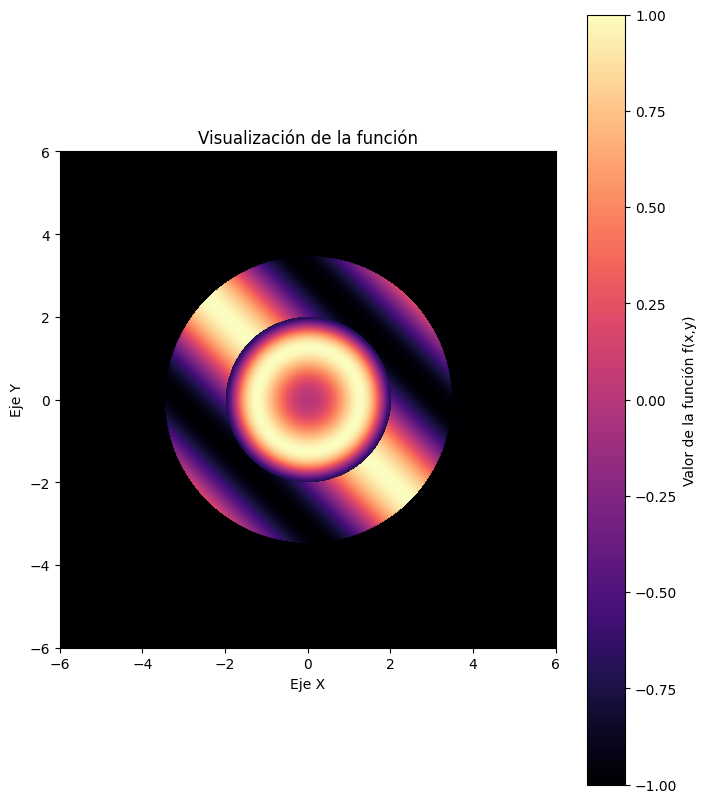

In [114]:
# Visulaización de la función
plt.figure(figsize=(8, 10))
plt.imshow(Z, cmap='magma', extent=[-6, 6, -6, 6])
plt.colorbar(label='Valor de la función f(x,y)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Visualización de la función')
plt.show()

3.  Resuelva el siguiente sistema de ecuaciones lineales:

$2x_1-x_2+3x_3+x_4-x_5 = 7 \\
x_1+2x_2-x_3+2x_4+x_5 =4 \\
3x_1-x_2+x_3-x_4+2x_5 = 10 \\
x_1+x_2+x_3+x_4+x_5 = 5 \\
-2x_1+4x_2+x_3-3x_4+x_5 = 0
$

* Resolver el sistema

* Verificar la solución sustituyéndola en la ecuación original y evaluando $\|A\textbf{x}-\textbf{b}\|$

In [115]:
# Se requeire resolver el sistema Ax-b = 0 ó Ax=b
#se define la matriz del sistema
A = np.array([[2,-1,3,1,-1],
            [1,2,-1,2,1],
            [3,-1,1,-1,2],
            [1,1,1,1,1],
            [-2,4,1,-3,1]])
# vector independiente
b = np.array([7,4,10,5,0])


In [116]:
# primero se verifica si el determinante de la matriz A es diferente de 0
det_A = np.linalg.det(A)
print('El determinante de la matriz A es:', det_A)

El determinante de la matriz A es: -144.99999999999997


como $det(A)\neq 0 ⇒ \exists  A^{-1}, \therefore $ se procede a resolver el sistema

In [117]:
# Se resulve el sistema Ax-b=0 aplicando la inversa => x =A^(-1)*b
x = np.dot(np.linalg.inv(A), b)
print('La solución es [x1, x2, x3, x4, x5]:\n',x)

La solución es [x1, x2, x3, x4, x5]:
 [ 3.03448276  1.          0.86206897 -0.27586207  0.37931034]


In [118]:
# se verifica la solución sistituyendo en la ecuación original
verificar_sol = np.dot(A,x)-b
verificar_sol

array([ 0.00000000e+00,  1.77635684e-15,  0.00000000e+00,  0.00000000e+00,
       -4.44089210e-16])

In [119]:
verificar_sol.round()

array([ 0.,  0.,  0.,  0., -0.])

In [120]:
np.linalg.norm(np.dot(A,x)-b)

np.float64(1.831026719408895e-15)

In [121]:
np.linalg.norm(np.dot(A,x)-b).round()

np.float64(0.0)

4. Generar un array de 400 números aleatorios con distribución normal de media 10 y desviación estándar 2.

* Calcula la media y desviación estándar de la muestra.

* ¿Cuántos valores están entre 8 y 12?

In [122]:
import random as rd

# Se genera un arreglo de 400 números aleatorios con distribución normal
# con mu =10, sigma =2
muestra = np.random.normal(10, 2, 400)
muestra


array([12.40054285,  9.42394229, 10.26070112,  7.50304101,  9.77644014,
       10.40558031, 10.14867864,  8.83249512,  6.03703254,  9.34898474,
        7.12879284,  7.21069742, 12.33161902,  9.29367822, 12.83222325,
       10.50231866, 10.44079611, 10.29790768, 13.24544737,  8.3567076 ,
        7.57004492,  8.95836515,  8.57905373, 14.59221428,  9.25294083,
       10.48824629, 10.39216414, 12.65259284,  8.60304311, 10.33569908,
        9.99661308,  8.31586834, 10.73979391, 11.85434333, 10.16616107,
        9.80494077, 10.75780967,  7.73958837, 12.03998051, 11.00136007,
       12.23606771,  5.49986701, 14.64296381, 10.99032733, 11.43555284,
       11.14327791,  9.70794139,  6.47002324, 12.316132  ,  9.53654629,
       10.16724405,  8.05552326, 11.7683575 , 12.87805541, 10.94641503,
        7.18477309,  9.90621186, 10.00036392,  8.06442765,  7.98780302,
       10.99645208, 11.50120844, 11.25952094, 11.17003058,  6.7032449 ,
       11.59435004,  9.44779414, 10.79653927,  9.8789412 , 11.34

In [123]:
# Cálculo de la media de la muestra aleatoria
media_muestra = np.mean(muestra)
print('La media de la muestra aleatoria es:', media_muestra)

La media de la muestra aleatoria es: 9.981160358983415


In [124]:
# Cáclulo de la desviación estándar de la muestra aleatoria
desviacion_muestra = np.std(muestra)
print('La desviación estándar de la muestra aleatoria es:', desviacion_muestra)

La desviación estándar de la muestra aleatoria es: 1.962726706220005


In [125]:
# contar cuantos valores están entre 8 y 12
valores_entre_8_y_12 = np.sum((muestra >= 8) & (muestra <= 12))
print('La cantidad de valores que están entre 8 y 12 son:', valores_entre_8_y_12)

La cantidad de valores que están entre 8 y 12 son: 281


5. Simular una muestra de 200 observaciones donde cada valor puede ser 'A', 'B' o 'C' con probabilidades 0.5, 0.3 y 0.2, respectivamente (np.random.choice). Cuenta cuántas veces ocurre cada categoría.

In [126]:
# Se genera una muestra aleatoria de 200 observaciones con valores A, B o C
# con probabilidades 0.5, 0.3 y 0.2 respectivamente
muestra_aleatoria = np.random.choice(['A', 'B', 'C'], size=200, p=[0.5, 0.3, 0.2])

In [127]:
# Contar cuantas veces ocurre cada categoría
contar_categorias = np.unique(muestra_aleatoria, return_counts=True)
print('La cantidad de veces que ocurre cada categoría es:', contar_categorias)

La cantidad de veces que ocurre cada categoría es: (array(['A', 'B', 'C'], dtype='<U1'), array([99, 67, 34]))


6. Genera una señal base (por ejemplo, todos 100) y agrégale ruido gaussiano con desviación 5.

* Grafica la señal ruidosa.

* Calcula el error medio cuadrático con respecto a la señal original:



In [128]:
# se genera un señal con ruido gaussiano
señal_base = np.ones(100) #y_i
ruido = np.random.normal(0, 5, 100)
señal_ruidosa = señal_base + ruido # \hat{y^_i}

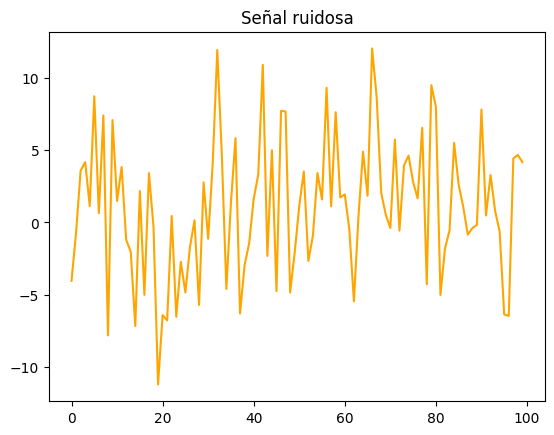

In [129]:
# Grafica de la señal ruidosa
plt.plot(señal_ruidosa, color = 'orange')
plt.title('Señal ruidosa')
plt.show()

Se calcula el error cuadrático medio $MSE$:

$MSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y})^2}$

In [130]:
# Cálculo del error cuadrático medio respecto a la señal
MSE = np.mean((señal_base - señal_ruidosa)**2)
print('El error cuadrático medio es:', MSE)


El error cuadrático medio es: 22.845830436434127


7. Dada la siguiente lista:

cadenas = [ ' juanperez!!', 'ana#LOPEZ? ', 'm@rio@@gomez', 'luis #MORA%%', 'carla!!méndóza ', 'PEDRO?ROSALES###', 'sofia#cano ', 'miguel//torres', 'lucia #ramirez:', ' josé+fernández ', ' camila#RUIZ', 'marcoantonio&', 'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!', 'DANIEL* #Martinez', ' andrés#s@las', 'pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?', 'Nicolásrodríguez', ' carmen?LUNA:', 'Rosa#AVILA', 'oscar?pineda;', 'alejandra!ríos+', 'IGNACIO#HERRERA ', ' sergioMENDOZA', 'tomás#ramírez=', 'ANDREA!MORENO?', '#manuel ortíz ', 'cristinaFLORES@', ' arturo#valdez;', 'LAURAméndez', 'mariana?ibarra!', ' esteban#quiroz ', 'valeria!CASTILLO', 'renata#DE la cruz', 'fernando?Vega:', 'irma!ZAPATA%', 'francisco#romero ', 'aliciaLara=', 'liliana#MENDEZ&', 'matías#galván;', '#ricardo!Ríos', ' catalinaALVARADO%', 'gustavo!morales+', 'natalia#VILLARREAL:', 'andréapáez;', ' Ramónsalinas!', ' david#molina ' ]

Limpie la lista 'cadenas'
Obtenga 50 etiquetas con el código: [f'id_{i:03}' for i in range(1, 51)]
Obtenga un objeto Series con la lista 'cadenas' indexado con las etiquetas obtenidas.

In [131]:
# La lista a limpiar es:
cadenas = [ ' juanperez!!', 'ana#LOPEZ? ', 'm@rio@@gomez', 'luis #MORA%%',
    'carla!!méndóza ', 'PEDRO?ROSALES###', 'sofia#cano ', 'miguel//torres',
    'lucia #ramirez:', ' josé+fernández ', ' camila#RUIZ', 'marcoantonio&',
    'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!', 'DANIEL* #Martinez',
    ' andrés#s@las', 'pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?',
    'Nicolásrodríguez', ' carmen?LUNA:', 'Rosa#AVILA', 'oscar?pineda;',
    'alejandra!ríos+', 'IGNACIO#HERRERA ', ' sergioMENDOZA', 'tomás#ramírez=',
    'ANDREA!MORENO?', '#manuel ortíz ', 'cristinaFLORES@', ' arturo#valdez;',
    'LAURAméndez', 'mariana?ibarra!', ' esteban#quiroz ', 'valeria!CASTILLO',
    'renata#DE la cruz', 'fernando?Vega:', 'irma!ZAPATA%', 'francisco#romero ',
    'aliciaLara=', 'liliana#MENDEZ&', 'matías#galván;', '#ricardo!Ríos',
    ' catalinaALVARADO%', 'gustavo!morales+', 'natalia#VILLARREAL:',
    'andréapáez;', ' Ramónsalinas!', ' david#molina ' ]


In [132]:
# se define un str cadena de caracteres
letras_validas = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZáéíóúÁÉÍÓÚñÑ '


In [133]:
# Se defiene una lista limpia
lista_limpia = []

# se utiliza un ciclo for para hacer la limpieza
for i in cadenas:
  nueva_cadena = ''
  for j in i:
    if j in letras_validas:
      nueva_cadena += j
      nueva_cadena = nueva_cadena.strip() # se quitan espacios al inicio y fin
      nueva_cadena = nueva_cadena.upper() # se pasa a mayúsculas
  lista_limpia.append(nueva_cadena)

for x in lista_limpia:
  print(x)

JUANPEREZ
ANALOPEZ
MRIOGOMEZ
LUISMORA
CARLAMÉNDÓZA
PEDROROSALES
SOFIACANO
MIGUELTORRES
LUCIARAMIREZ
JOSÉFERNÁNDEZ
CAMILARUIZ
MARCOANTONIO
ISABELGARZA
ROBERTOFLORES
EMILIAREYES
DANIELMARTINEZ
ANDRÉSSLAS
PABLOTORO
YESENIALÓPEZ
ELENAMORALES
NICOLÁSRODRÍGUEZ
CARMENLUNA
ROSAAVILA
OSCARPINEDA
ALEJANDRARÍOS
IGNACIOHERRERA
SERGIOMENDOZA
TOMÁSRAMÍREZ
ANDREAMORENO
MANUELORTÍZ
CRISTINAFLORES
ARTUROVALDEZ
LAURAMÉNDEZ
MARIANAIBARRA
ESTEBANQUIROZ
VALERIACASTILLO
RENATADELACRUZ
FERNANDOVEGA
IRMAZAPATA
FRANCISCOROMERO
ALICIALARA
LILIANAMENDEZ
MATÍASGALVÁN
RICARDORÍOS
CATALINAALVARADO
GUSTAVOMORALES
NATALIAVILLARREAL
ANDRÉAPÁEZ
RAMÓNSALINAS
DAVIDMOLINA


In [134]:
# se generan etiquetas de id_001 a id_050
etiquetas = [f'id_{i:03}' for i in range(1, 51)]

# Crear la serie indexada
nombres_series = pd.Series(lista_limpia, index=etiquetas)

# Imprimir resultado
print(nombres_series)

id_001            JUANPEREZ
id_002             ANALOPEZ
id_003            MRIOGOMEZ
id_004             LUISMORA
id_005         CARLAMÉNDÓZA
id_006         PEDROROSALES
id_007            SOFIACANO
id_008         MIGUELTORRES
id_009         LUCIARAMIREZ
id_010        JOSÉFERNÁNDEZ
id_011           CAMILARUIZ
id_012         MARCOANTONIO
id_013          ISABELGARZA
id_014        ROBERTOFLORES
id_015          EMILIAREYES
id_016       DANIELMARTINEZ
id_017           ANDRÉSSLAS
id_018            PABLOTORO
id_019         YESENIALÓPEZ
id_020         ELENAMORALES
id_021     NICOLÁSRODRÍGUEZ
id_022           CARMENLUNA
id_023            ROSAAVILA
id_024          OSCARPINEDA
id_025        ALEJANDRARÍOS
id_026       IGNACIOHERRERA
id_027        SERGIOMENDOZA
id_028         TOMÁSRAMÍREZ
id_029         ANDREAMORENO
id_030          MANUELORTÍZ
id_031       CRISTINAFLORES
id_032         ARTUROVALDEZ
id_033          LAURAMÉNDEZ
id_034        MARIANAIBARRA
id_035        ESTEBANQUIROZ
id_036      VALERIAC